In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
data=pd.read_csv('/content/insurance.csv')

In [24]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [25]:
data.shape

(1338, 7)

In [26]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-27-f065e28ce1fb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


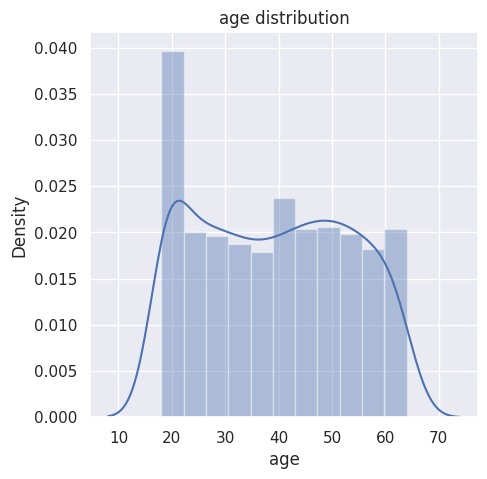

In [27]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['age'])
plt.title('age distribution')
plt.show()

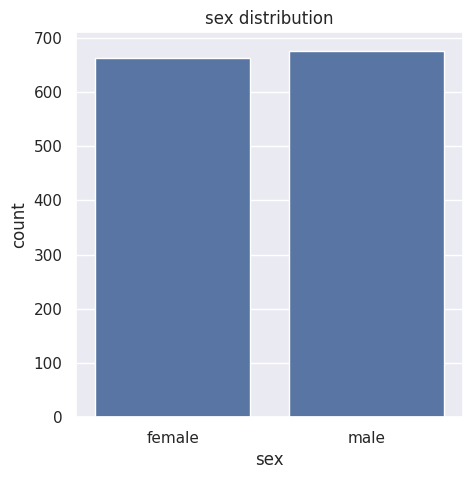

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=data)
plt.title('sex distribution')
plt.show()

<ipython-input-29-b20874ac0ef1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


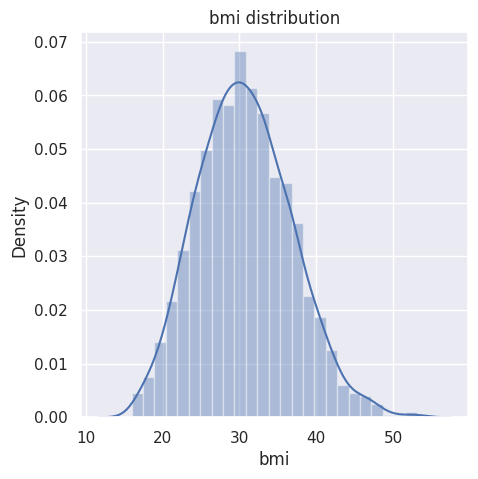

In [29]:
plt.figure(figsize=(5,5))
sns.distplot(data['bmi'])
plt.title('bmi distribution')
plt.show()

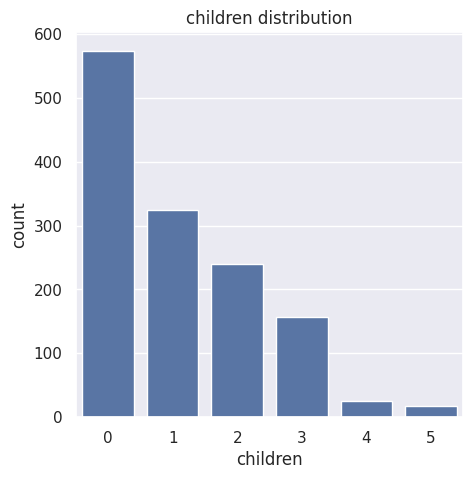

In [30]:
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=data)
plt.title('children distribution')
plt.show()

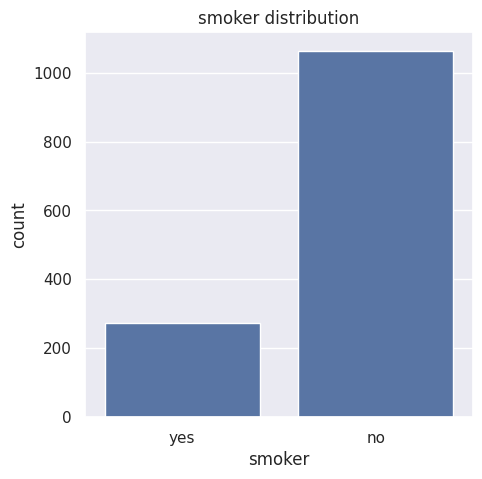

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=data)
plt.title('smoker distribution')
plt.show()

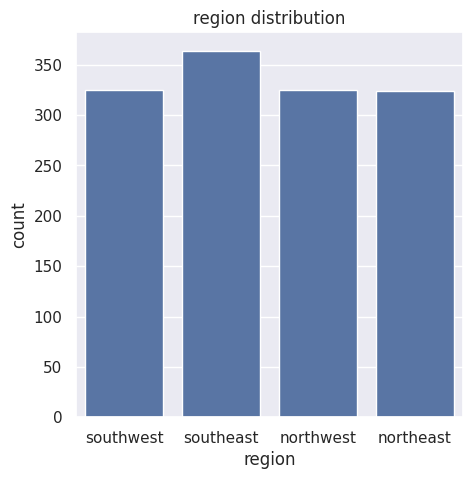

In [32]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=data)
plt.title('region distribution')
plt.show()

<ipython-input-33-983b7a283d44>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


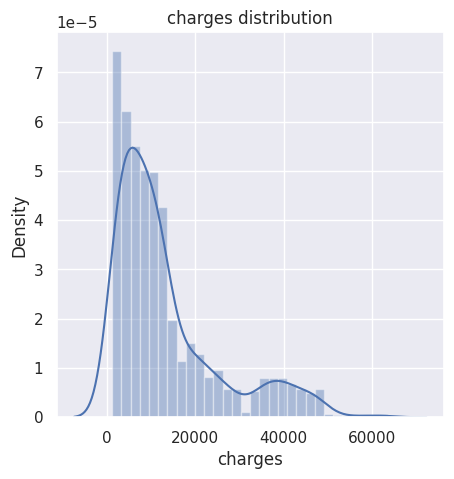

In [33]:
plt.figure(figsize=(5,5))
sns.distplot(data['charges'])
plt.title('charges distribution')
plt.show()

In [34]:
data.replace({'sex':{'male':1,'female':0},'smoker':{'yes':1,'no':0},'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [35]:
data.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       0  16884.92400
1   18    1  33.770         1       0       1   1725.55230
2   28    1  33.000         3       0       1   4449.46200
3   33    1  22.705         0       0       2  21984.47061
4   32    1  28.880         0       0       2   3866.85520

In [37]:
print(data['sex'].value_counts())
print(data['smoker'].value_counts())
print(data['region'].value_counts())

sex
1    676
0    662
Name: count, dtype: int64
smoker
0    1064
1     274
Name: count, dtype: int64
region
1    364
0    325
2    325
3    324
Name: count, dtype: int64


In [38]:
x=data.drop('charges',axis=1)
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       0
1      18    1  33.770         1       0       1
2      28    1  33.000         3       0       1
3      33    1  22.705         0       0       2
4      32    1  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       2
1334   18    0  31.920         0       0       3
1335   18    0  36.850         0       0       1
1336   21    0  25.800         0       0       0
1337   61    0  29.070         0       1       2

[1338 rows x 6 columns]


In [39]:
y=data['charges']

In [40]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [42]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [43]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [45]:
xtrainpredict=model.predict(x_train)
print(xtrainpredict)


[  852.63979349  9173.4786418  12809.13017864 ... 16934.63879935
  9224.06278234 14135.88486686]


In [47]:
xtrainmse=metrics.r2_score(y_train,xtrainpredict)
print(xtrainmse)

0.7519923667088932


In [46]:
xtestpredict=model.predict(x_test)
print(xtestpredict)

[ 1885.54165174 11944.32273357 10455.55488707  2397.96696161
  8271.55347048 11234.41036809  3376.43169724  1072.63123623
 12060.51395933  9468.23322457 11494.97066851  5053.0305502
 30093.5527384   -228.58148206 12784.84199754 13402.21956446
  4179.28948043  7740.09899682 29568.66245635  2738.01455718
 12343.38521075  1881.51269934 34087.95253065 32103.24119851
 30445.32061394  8632.58788645  2298.01995336 15417.01187725
  6168.10928884  1942.95830544  9636.84483913  5642.81556233
  4058.10854408  4853.19902886  9764.94270973  4755.04190386
 30007.20570516  6403.4791383  27582.56773006 14149.40158117
   151.96770571 28000.88252814  7724.4555082   1093.99727743
 10434.24794603  7636.92275042 11467.16787872  8328.38879353
 10915.23415866 13408.79328     6150.60763788 -1131.05313916
 26163.22877049 36999.48645124  6988.24506067 17480.13399005
  1018.83694558 11202.85589973  1775.35390886 34195.62805741
 11482.93499856   489.95740987  3859.74367758 36051.47915417
 -1428.73834052 14328.372

In [48]:
xtestmse=metrics.r2_score(y_test,xtestpredict)
print(xtestmse)

0.7445422986536503


In [50]:
input=(8,1,33.77,1,0,1)
inp_arr=np.asarray(input)
inp_reshape=inp_arr.reshape(1,-1)
prediction=model.predict(inp_reshape)
print(prediction)

[1339.64787363]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
